# Using Linear Regrssion to Forecast Passenger Survival on a Titanic Dataset

## 1. Introduction
On April 15, 1919 the unsinakble Titanic sank after colliding with an icebreg resulting in the death of 1502 out of 2224 passengers leading the survival rate of nearly 32%. The notebook will focus on building predictive models which can answer the following question: **What sorts of people were more likely to survive?**

This is my first machine learning notebook. I chose titaninc dataset because of the wide availablity of other people's work. I will focu on doing some illustrative data analyisis using `Tableau` and `Python`. I am a newbie in Machine Learning and want to leaarn alot so, feedback will be appreciated. 

### 1.1 Contents of the Notebook

1. Loading the libraries
2. Performing exploaratory data analysis on the data
3. Feature Engineering and Data Cleaning
4. Data Visualization
5. 

### 1.2 Workflow Goals

1. **Data Exploration and preprocessing:** Perform exploratory data analysis (EDA) to understand the disrtibution and relationships between the features. Handle missing values and outliers. I will also convert categorical values to numarical values using lable encoder.

2. **Feature Engineering:** I might create new features if necessary that may help imporve the model's accuracy. 

3. **Model Selection And Training:** Select a suitable model to predict the survival outcomes, such as logistic regression, decision tree, random forest, or a neural network. Split the data into training and validation sets and train the model on the training set. Tune hyperparameters using cross-validation and evaluate the model's performance on the validation set.

4. **Model evaluation and interpretation:** During this stage, I will evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1-score. This will interpret the model's results to gain insights into the factors that contribute to passenger survival.

### 1.3 Load libraries and check dataset

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

import os
import warnings
from sklearn.preprocessing import LabelEncoder #Data Encoding

import missingno as msno #For exploratory visulization of missing values
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')


In [82]:
data_raw = pd.read_csv('../input/titanic/train.csv')
data_val = pd.read_csv('../input/titanic/test.csv')
data1 = data_raw.copy(deep = True)

datasets = [data_val,data1]
#Print first five rows of the data
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis


### 2.1 Missing Values

In [83]:
#Checking the null values
print(data1.isnull().sum())
print(data1.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


<AxesSubplot:>

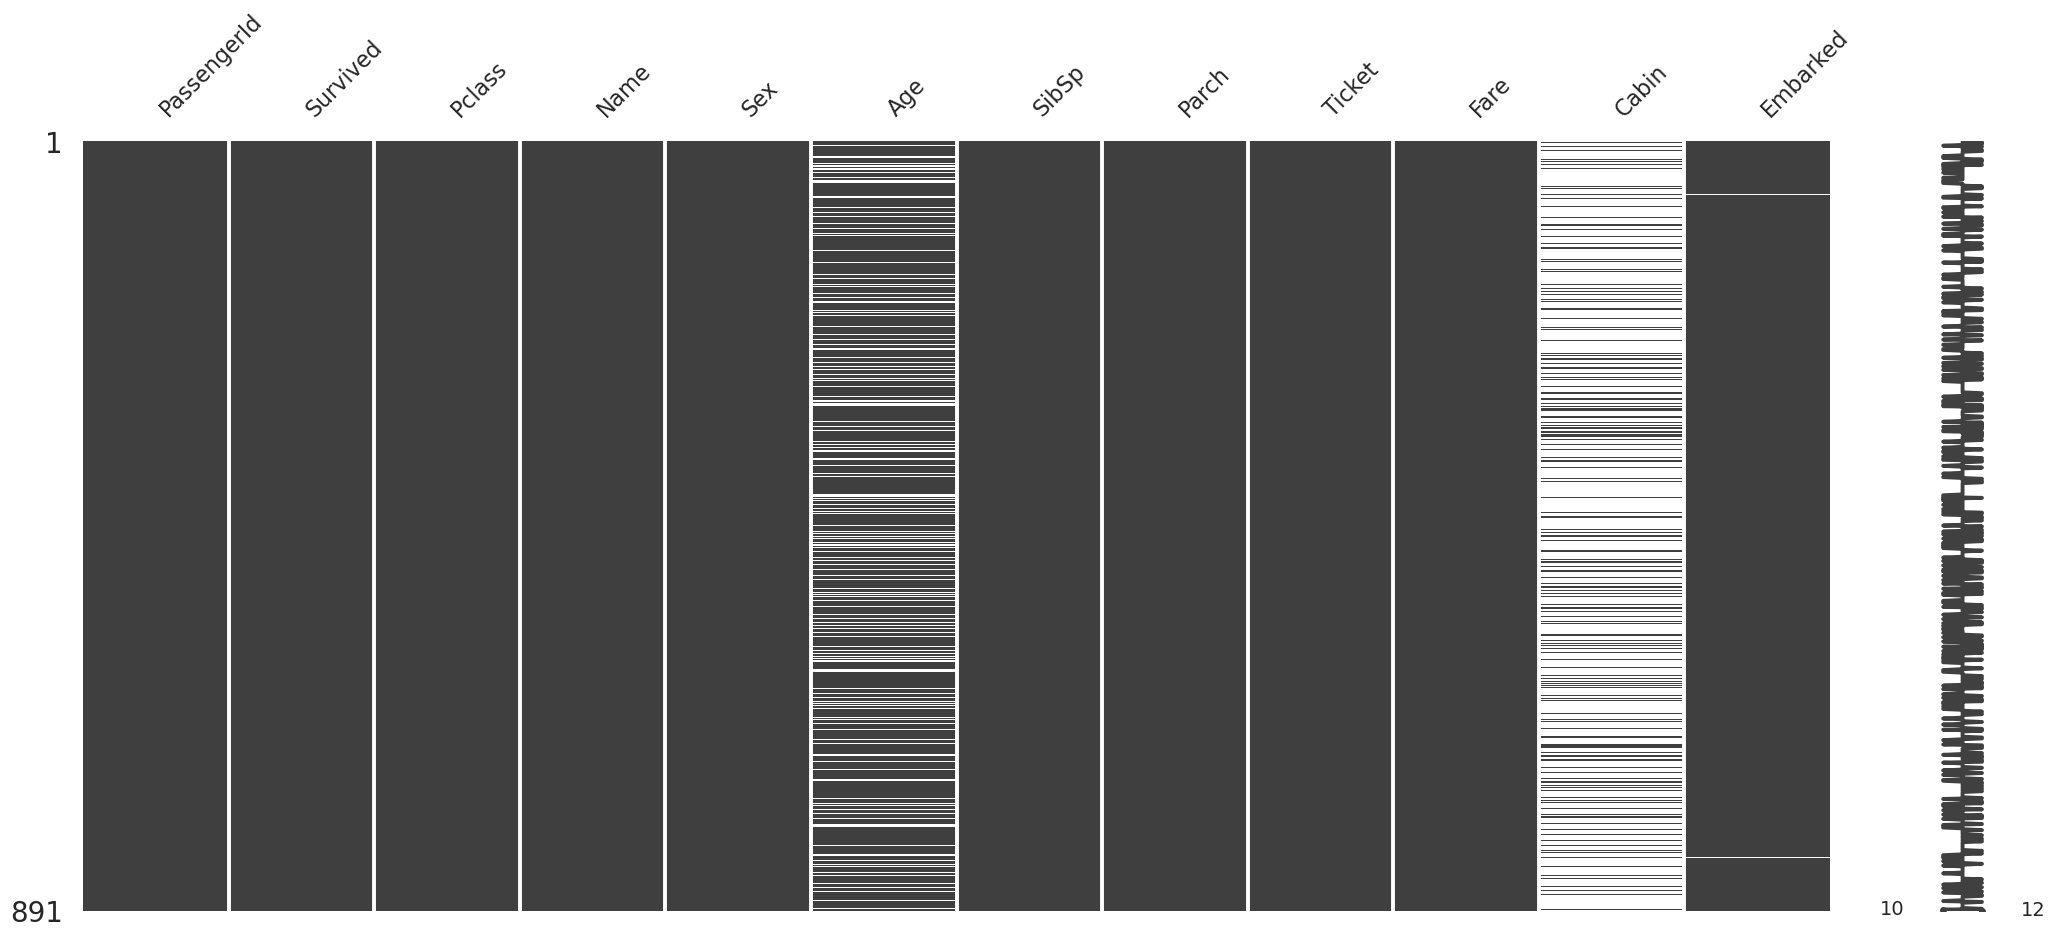

In [84]:
#Visualization of Missing Values, where white lines denote the missing values
msno.matrix(data1)

#### Strategies to handle the missing values

The <b> age, embarked</b> and <b>Cabin</b> have null values. Below are some startegies to handle the null/missing values in the data. 

**1. Delete Rows with Missing Values:**

- From the graph above, and the shape of the data, there are more than half rows which contain missing values. So, we cannot simply delete the null values, because we will lose a lots of information. 

**2. Impute missing values with Mean/Median:**

- The `age` column is having numeric countinuous values, so we can replace the missing values, either by mean, median or mode.

**3. Impute mssing categorical values:**

- The `Cabin` column has 687 missing valeus and I can replace them with a new category called `U`. However, the varibale has lots of missing values, it will not add value and thus is excluded from the analysis.

In [85]:
for data in datasets:
    
    #Replacing NaN values of category Age with mean 

    #data['Age'] = data['Age'].replace(np.NaN,data['Age'].median(), inplace = True)
    data['Age'].fillna(data['Age'].median(), inplace=True)

    #Replacing NaN values of Cabin with 'U'
    #data['Cabin'] = data['Cabin'].fillna('U')
    
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
    
    data['Fare'].fillna(data['Fare'].median(), inplace = True)

#Delete PassengerId, Cabin and Ticket columns/features
drop_col = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_col, axis = 1, inplace = True)

print(data1.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


### 2.2 Label Encoding

In [86]:
#Label Encoding on the variable Sex

data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [87]:
#Label Encoding for the gender
#1 = Male
#2 = Female
data['Sex_encoded'] = LabelEncoder().fit_transform(data['Sex'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_encoded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [88]:
#Label Encoding on 

## 3. Data Visualization
### 3.1 Correlation between different features of the dataset
We will 

In [89]:
corr_matrix = data.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333
Sex_encoded,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000


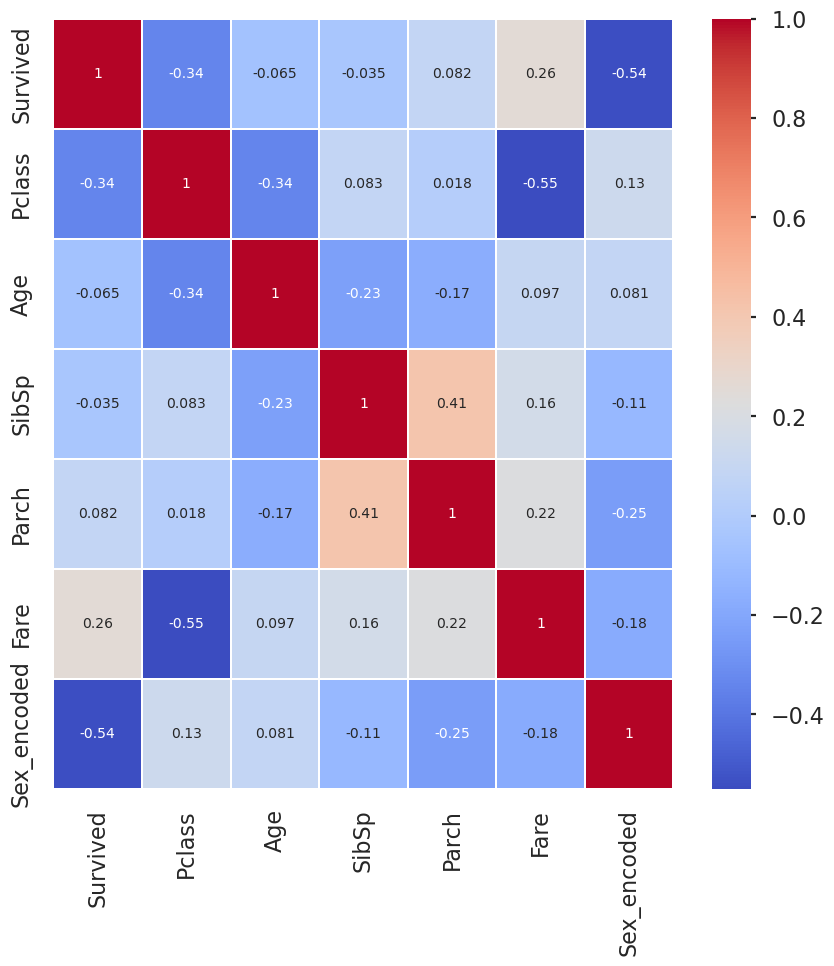

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidths=0.2)
fig = plt.gcf()
plt.show()

### How many Survived?
Based on the heatmap, it is clear that there is a correlation between survived and sex_encoded variables. Correlation also exists between pclass and fiar varibales. So, let's plot some graphs to understand the distrbution of survived variables and 


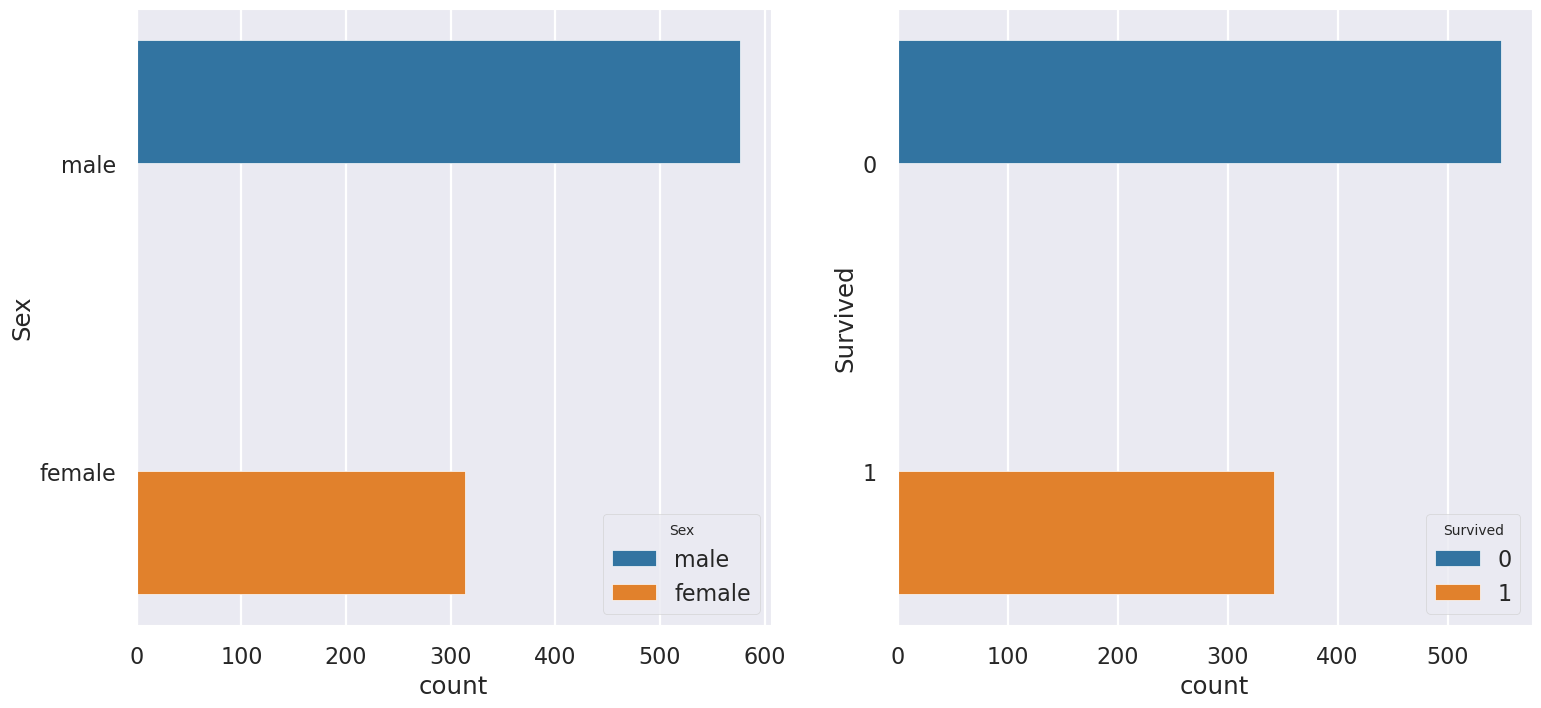

In [91]:
f,axis = plt.subplots(1,2,figsize=(18,8))
sns.set_style('darkgrid')
sns.countplot(y='Sex', data = data, hue = "Sex", ax=axis[0])
sns.countplot(y='Survived',data=data ,hue='Survived',ax=axis[1])
plt.show()

In [92]:
f,axis = plt.subplots(1,2,3,figsize=(18,8))
sns.set_style('darkgrid')
sns.countplot(data,x='Sex',hue='Survived', ax = axis[0])

sns.barplot(data, y='Survived',x='Sex',ax=axis[2])
plt.show()

TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

#### Gender disrtibution on the Ship

In [ ]:
#data['Sex'].value_counts()
data.Sex.value_counts(sort=False)

In [ ]:
#data.drop('Sex',inplace = True, axis = 1)
#print("Done!")

### Performing Parametric Test

In [ ]:
#df = pd.read_csv('../input/titanic/train.csv')
plt.hist(data, bins=20, density = True, alpha = 0.5)

#df['log_data'] = np.log(df['data'])